In [1]:
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
from State import State


In [2]:
env = State()
env.create_state([-1,0,0])

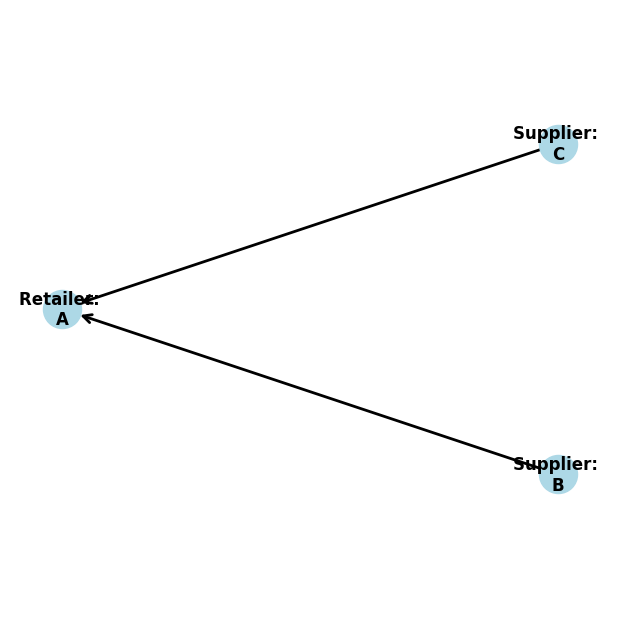

In [3]:
env.show_network()

In [4]:
env.observation_space.sample()

array([404, 684, 877,  73], dtype=int64)

In [5]:
episodes = 10
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        #env.render()
        action = env.action_space.sample()
        print(type(action))
        print("action" + str(action))
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))

<class 'int'>
action21
<class 'int'>
action42
<class 'int'>
action34
<class 'int'>
action68
<class 'int'>
action36
<class 'int'>
action81
<class 'int'>
action66
<class 'int'>
action56
<class 'int'>
action96
<class 'int'>
action17
<class 'int'>
action98
<class 'int'>
action25
<class 'int'>
action9
<class 'int'>
action78
<class 'int'>
action53
<class 'int'>
action85
<class 'int'>
action6
<class 'int'>
action0
<class 'int'>
action22
<class 'int'>
action6
<class 'int'>
action75
<class 'int'>
action8
<class 'int'>
action11
<class 'int'>
action23
Episode:1 Score:-9942.84
<class 'int'>
action47
<class 'int'>
action67
<class 'int'>
action19
<class 'int'>
action66
<class 'int'>
action66
<class 'int'>
action50
<class 'int'>
action9
<class 'int'>
action61
<class 'int'>
action65
<class 'int'>
action90
<class 'int'>
action6
<class 'int'>
action50
<class 'int'>
action20
<class 'int'>
action88
<class 'int'>
action21
<class 'int'>
action2
<class 'int'>
action28
<class 'int'>
action44
<class 'int'>
act

c:\Users\darry\OneDrive\Desktop\NUS\Astar\Forecasters\RLsrc\Demandable.py:344: RuntimeWarning: invalid value encountered in double_scalars
  return total * self.holding_cost


In [6]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

from rl.agents import DDPGAgent

In [7]:
states = env.observation_space.shape
actions = env.action_space.n

In [8]:
states

(4,)

In [9]:
actions

100

In [10]:
def build_model(states, actions):
    model = Sequential()    
    model.add(Dense(24, activation='relu', input_shape=(1,4)))
    model.add(Dense(24, activation='relu'))
    model.add(Flatten())
    model.add(Dense(actions, activation='linear'))
    return model

In [11]:
model = build_model(states, actions)


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 24)             120       
                                                                 
 dense_1 (Dense)             (None, 1, 24)             600       
                                                                 
 flatten (Flatten)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 100)               2500      
                                                                 
Total params: 3,220
Trainable params: 3,220
Non-trainable params: 0
_________________________________________________________________


In [13]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [14]:
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)

C:\Users\darry\AppData\Roaming\Python\Python311\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 50000 steps ...
Interval 1 (0 steps performed)


c:\Users\darry\OneDrive\Desktop\NUS\Astar\Forecasters\RLsrc\Demandable.py:344: RuntimeWarning: invalid value encountered in double_scalars
  return total * self.holding_cost
C:\Users\darry\AppData\Roaming\Python\Python311\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   10/10000 [..............................] - ETA: 57s - reward: -179.9010 

c:\Users\darry\AppData\Local\Programs\Python\Python311\Lib\site-packages\rl\memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


10000/10000 [==============================] - 366s 37ms/step - reward: -63.1261
416 episodes - episode_reward: -1521.422 [-43840.900, 3685.410] - loss: 52268.191 - mae: 436.528 - mean_q: -156.818

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 374s 37ms/step - reward: -436.3816
417 episodes - episode_reward: -10459.955 [-37786.730, 4219.250] - loss: 900586995712.000 - mae: 793217.250 - mean_q: 1146869.125

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 382s 38ms/step - reward: -537.7829
417 episodes - episode_reward: -12897.345 [-36175.210, 837.350] - loss: 2325588425572352.000 - mae: 82981248.000 - mean_q: 110482592.000

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 358s 36ms/step - reward: -535.6329
416 episodes - episode_reward: -12873.137 [-33558.900, 652.790] - loss: 37303667866468352.000 - mae: 460735968.000 - mean_q: 564938432.000

Interval 5 (40000 steps performed)
10000/1

In [15]:
scores = dqn.test(env, nb_episodes=100, visualize=False)
print(np.mean(scores.history['episode_reward']))

Testing for 100 episodes ...
Episode 1: reward: -51660.720, steps: 24
Episode 2: reward: -53893.220, steps: 24
Episode 3: reward: -54756.630, steps: 24
Episode 4: reward: -55388.880, steps: 24
Episode 5: reward: -50095.680, steps: 24
Episode 6: reward: -53642.930, steps: 24
Episode 7: reward: -51081.420, steps: 24
Episode 8: reward: -54310.780, steps: 24
Episode 9: reward: -54821.040, steps: 24
Episode 10: reward: -54646.920, steps: 24
Episode 11: reward: -52837.200, steps: 24
Episode 12: reward: -52035.000, steps: 24
Episode 13: reward: -54278.860, steps: 24
Episode 14: reward: -51837.160, steps: 24
Episode 15: reward: -55274.830, steps: 24
Episode 16: reward: -54456.900, steps: 24
Episode 17: reward: -52293.140, steps: 24
Episode 18: reward: -53529.120, steps: 24
Episode 19: reward: -51257.350, steps: 24
Episode 20: reward: -49445.440, steps: 24
Episode 21: reward: -53742.890, steps: 24
Episode 22: reward: -52095.080, steps: 24
Episode 23: reward: -51003.290, steps: 24
Episode 24: re

In [16]:

_ = dqn.test(env, nb_episodes=15, visualize=True)

Testing for 15 episodes ...


TypeError: State.render() got an unexpected keyword argument 'mode'